In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=2)

import os
import sys
sys.path.append('../')
import utils
import synthetic_data_generator as sdg

from tqdm import tqdm
from glob import glob
from pathlib import Path

# Functions

In [2]:
def get_clusters_covering_a_region(regions_df, clusters_df):
    # Process alerts_df to check for accuracy and what region it corresponds to if it is correct
    clusters_df['region_id_covered'] = np.nan
    for index, cluster in clusters_df.iterrows():
        for _, region in regions_df.iterrows():
            # Check if there is a true region that has an overlap with the interval [cluster['start'], cluster['end']]
            if (region['unix_start'] <= cluster['start'] <= region['unix_end']) or (cluster['start'] <= region['unix_start'] <= cluster['end']):
                clusters_df.loc[index, 'region_id_covered'] = int(region['region_id'])

    return clusters_df

def get_true_and_predicted_regions(regions_df, clusters_df):
    real_regions = []
    for _, real_region_row in regions_df.iterrows():
        range = [real_region_row['unix_start'], real_region_row['unix_end']]
        real_regions.append(range)
    
    predicted_regions = []
    for _, pred_region in clusters_df.iterrows():
        range = [pred_region['point_start'], pred_region['point_end']]
        predicted_regions.append(range)
    return real_regions, predicted_regions


def get_evaluation_measures(real_regions, predicted_regions):
    precision = utils.metrics.range_based_precision(real_regions, predicted_regions)
    recall = utils.metrics.range_based_recall(real_regions, predicted_regions)
    f1_score = utils.helpers.compute_f1_score(precision, recall) 
    return precision, recall, f1_score

# Variable Threshold for adjusted local minima

In [3]:
input_dir = '../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/12_48/seed_1/'

thresholds = np.linspace(0.01, 1, 50)

df = pd.read_pickle(input_dir + 'df.pickle')
regions_df = pd.read_pickle(input_dir + 'regions_df.pickle')
regions_df = utils.alerts.update_regions_df(regions_df, df)

eval_dict = {'threshold': [], 'precision': [], 'recall': [], 'f1_score': []}

for threshold in tqdm(thresholds):
    # Run KDE with specified parameters
    cur_df, density_df, clusters_df, selected_bandwidth = utils.clustering.perform_clustering(
        df=df, kernel='epa', bandwidth_selection='ISJ',
        bandwidth=86400, adjusted_local_minima=True, threshold=threshold
    )

    clusters_df = get_clusters_covering_a_region(regions_df, clusters_df)
    clusters_df = clusters_df.sort_values(by='area', ascending=False).head(len(regions_df.index))

    real_regions, predicted_regions = get_true_and_predicted_regions(regions_df, clusters_df)
    precision, recall, f1_score = get_evaluation_measures(real_regions, predicted_regions)

    eval_dict['threshold'].append(threshold)
    eval_dict['precision'].append(precision)
    eval_dict['recall'].append(recall)
    eval_dict['f1_score'].append(f1_score)

eval_df = pd.DataFrame.from_dict(eval_dict)
eval_df

100%|██████████| 50/50 [00:12<00:00,  4.06it/s]


,threshold,precision,recall,f1_score
0,0.010000,0.700689,0.857675,0.771275
1,0.030204,0.768142,0.842884,0.803779
2,0.050408,0.811158,0.840106,0.825378
3,0.070612,0.811158,0.840106,0.825378
4,0.090816,0.811158,0.840106,0.825378
5,0.111020,0.811158,0.840106,0.825378
6,0.131224,0.811158,0.840106,0.825378
7,0.151429,0.811158,0.840106,0.825378
8,0.171633,0.811158,0.840106,0.825378
9,0.191837,0.811158,0.840106,0.825378


In [4]:
# Evaluation without using adjusted local minima
cur_df, density_df, clusters_df, selected_bandwidth = utils.clustering.perform_clustering(
    df=df, kernel='epa', bandwidth_selection='ISJ',
    bandwidth=86400, adjusted_local_minima=False
)

clusters_df = get_clusters_covering_a_region(regions_df, clusters_df)
clusters_df = clusters_df.sort_values(by='area', ascending=False).head(len(regions_df.index))

real_regions, predicted_regions = get_true_and_predicted_regions(regions_df, clusters_df)
no_adj_local_min_precision, no_adj_local_min_recall, no_adj_local_min_f1_score = get_evaluation_measures(real_regions, predicted_regions)

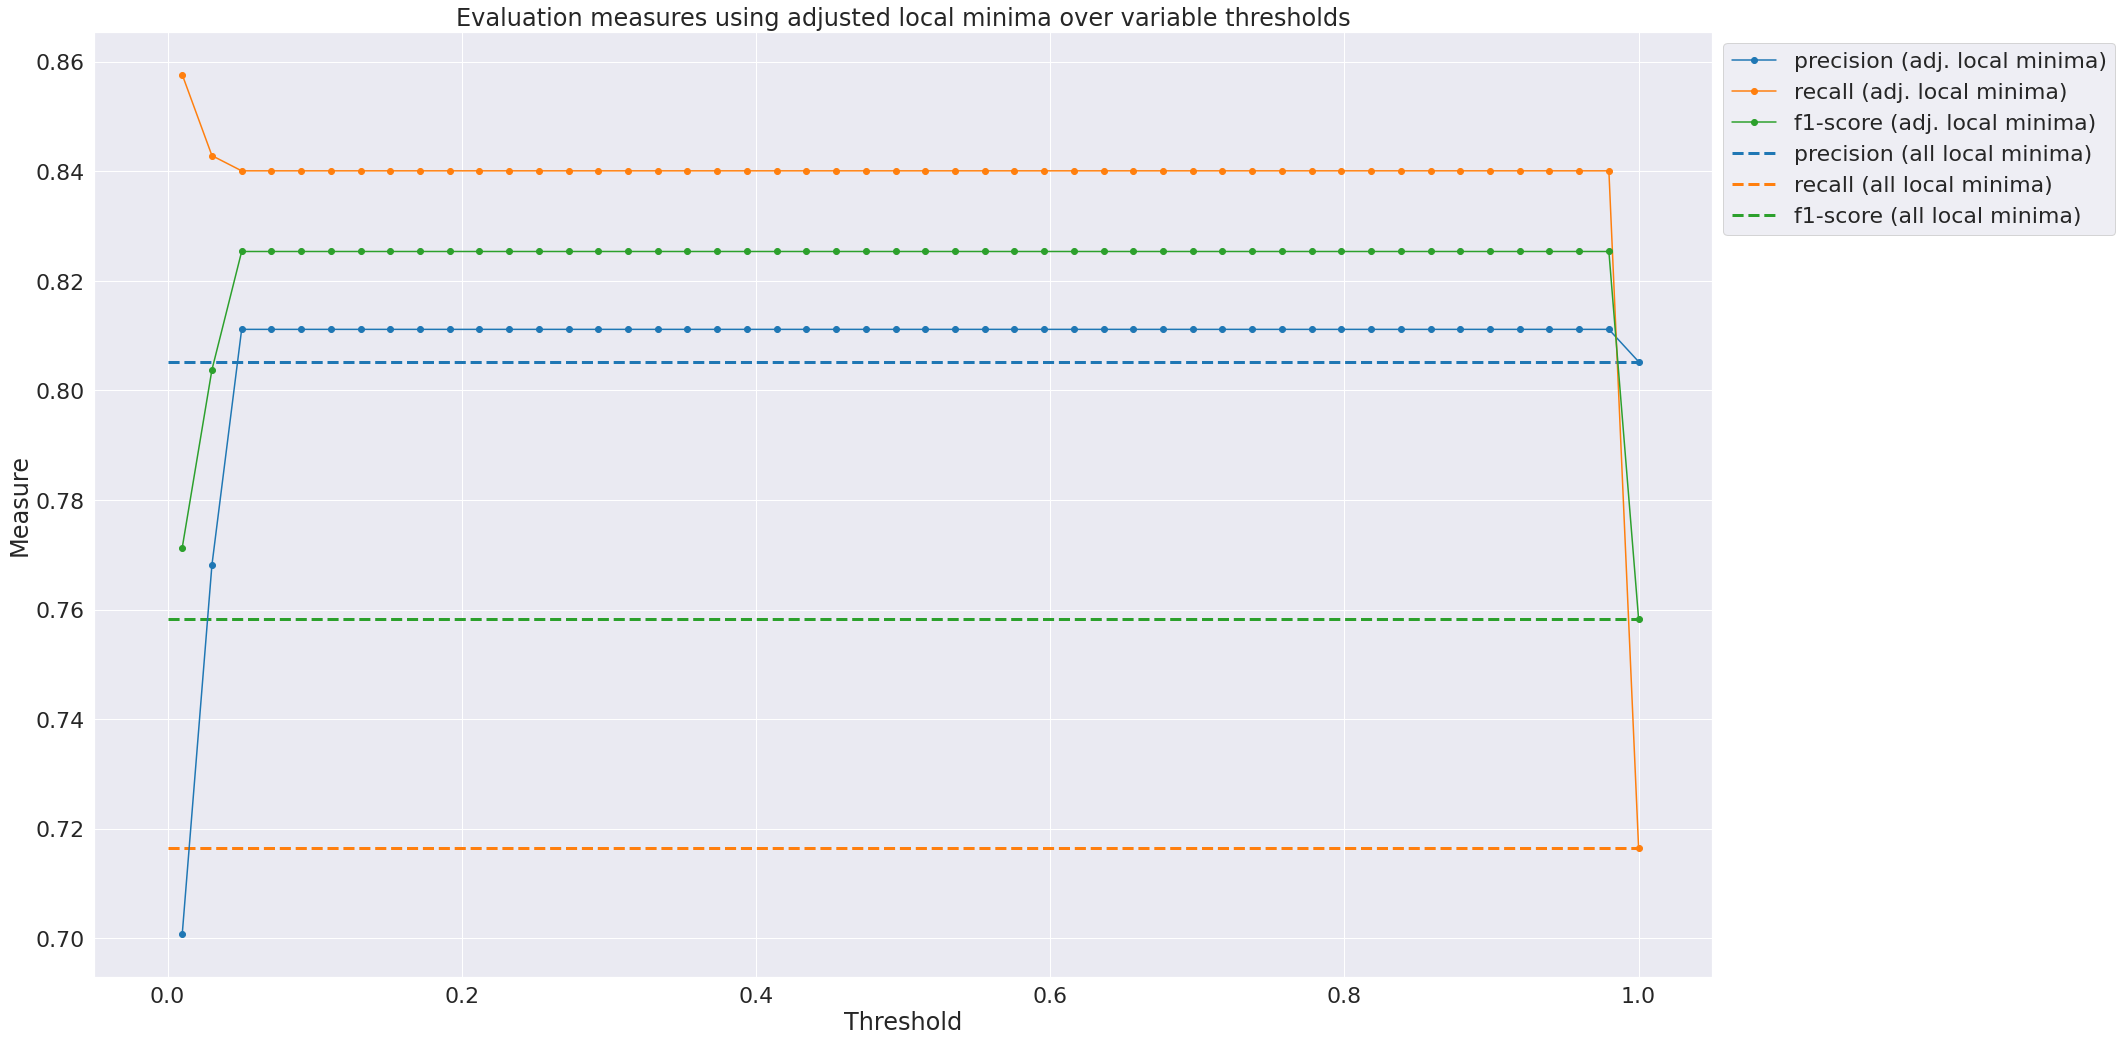

In [13]:
plt.plot(eval_df['threshold'], eval_df['precision'], marker='o', color='tab:blue', label='precision (adj. local minima)')
plt.plot(eval_df['threshold'], eval_df['recall'], marker='o', color='tab:orange', label='recall (adj. local minima)')
plt.plot(eval_df['threshold'], eval_df['f1_score'], marker='o', color='tab:green', label='f1-score (adj. local minima)')

plt.hlines(y=no_adj_local_min_precision, xmin=0, xmax=1, colors='tab:blue', linestyles='--', lw=3, label='precision (all local minima)')
plt.hlines(y=no_adj_local_min_recall, xmin=0, xmax=1, colors='tab:orange', linestyles='--', lw=3, label='recall (all local minima)')
plt.hlines(y=no_adj_local_min_f1_score, xmin=0, xmax=1, colors='tab:green', linestyles='--', lw=3, label='f1-score (all local minima)')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Evaluation measures using adjusted local minima over variable thresholds');plt.xlabel('Threshold');plt.ylabel('Measure');plt.tight_layout()

plt.savefig('../figures/benchmarking/adjusted_local_minima_vs_variable_thresholds.svg')